In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchinfo import summary
import torch.optim as optim
from torchviz import make_dot

In [3]:
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [4]:
# 2値分類のため、元データから2クラスのデータを抽出
x_data = iris.data[:100, :2]
y_data = iris.target[:100]

print('抽出データ', x_data.shape, y_data.shape)

抽出データ (100, 2) (100,)


In [10]:
# データを訓練データとテストデータに分割
print(x_data.shape, y_data.shape)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=70, test_size=30, random_state=123)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (70,) (30, 2) (30,)


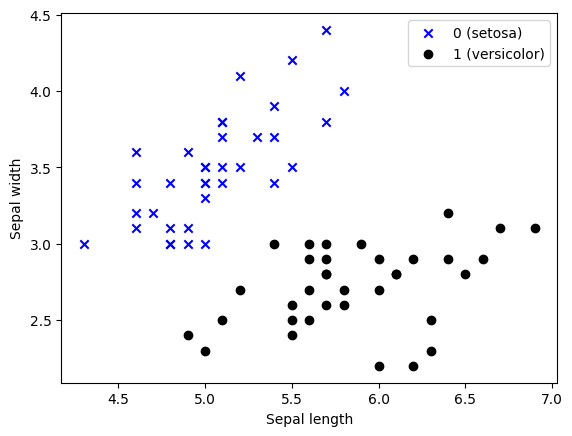

In [11]:
# 散布図の表示
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:, 0], x_t0[:, 1], label='0 (setosa)', marker='x', c='b')
plt.scatter(x_t1[:, 0], x_t1[:, 1], label='1 (versicolor)', marker='o', c='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

In [12]:
n_inputs = x_train.shape[1]
n_outputs = 1

class Net(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.l1 = nn.Linear(n_inputs, n_outputs)
        self.sigmoid = nn.Sigmoid()

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
    
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        return x2

In [15]:
summary(Net(2, 1), (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [16]:
inputs_train = torch.tensor(x_train).float()
labels_train = torch.tensor(y_train).float().view(-1, 1)

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float().view(-1, 1)

In [17]:
criterion = nn.BCELoss()
lr = 0.01

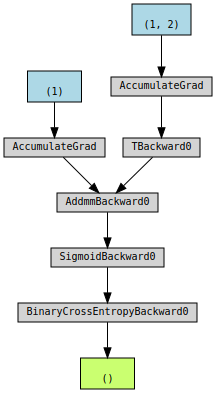

In [19]:
outputs = Net(2, 1)(inputs_train)
loss = criterion(outputs, labels_train)
g = make_dot(loss, params=dict(Net(2, 1).named_parameters()))
display(g)

In [25]:
# 学習
net = Net(n_inputs, n_outputs)

lr = 0.01

optimizer = optim.SGD(net.parameters(), lr=lr)

criterion = nn.BCELoss()

n_epochs = 50000

history = np.zeros((0, 5))

for epoch in range(n_epochs):
    optimizer.zero_grad()

    outputs = net(inputs_train)

    loss = criterion(outputs, labels_train)

    loss.backward()
    
    optimizer.step()

    train_loss = loss.item()

    predicted = torch.where(outputs < 0.5, 0, 1)

    train_acc = (predicted == labels_train).sum() / len(y_train)

    with torch.no_grad():
        outputs_test = net(inputs_test)

        test_loss = criterion(outputs_test, labels_test)

        predicted_test = torch.where(outputs_test < 0.5, 0, 1)

        test_acc = (predicted_test == labels_test).sum() / len(y_test)

    if epoch % 100 == 0:
        print(f'epoch: {epoch}, loss: {train_loss:.4f}, acc: {train_acc:.4f}, test_loss: {test_loss:.4f}, test_acc: {test_acc:.4f}')
        item = np.array([epoch, train_loss, train_acc, test_loss, test_acc])
        history = np.vstack((history, item))

epoch: 0, loss: 4.7729, acc: 0.5000, test_loss: 4.4938, test_acc: 0.5000
epoch: 100, loss: 0.7295, acc: 0.2429, test_loss: 0.7410, test_acc: 0.1333
epoch: 200, loss: 0.6582, acc: 0.8143, test_loss: 0.6775, test_acc: 0.7000
epoch: 300, loss: 0.5980, acc: 0.9429, test_loss: 0.6235, test_acc: 0.9000
epoch: 400, loss: 0.5472, acc: 0.9857, test_loss: 0.5776, test_acc: 0.9333
epoch: 500, loss: 0.5039, acc: 1.0000, test_loss: 0.5383, test_acc: 0.9333
epoch: 600, loss: 0.4669, acc: 1.0000, test_loss: 0.5045, test_acc: 0.9333
epoch: 700, loss: 0.4349, acc: 1.0000, test_loss: 0.4752, test_acc: 0.9333
epoch: 800, loss: 0.4072, acc: 1.0000, test_loss: 0.4497, test_acc: 0.9333
epoch: 900, loss: 0.3830, acc: 1.0000, test_loss: 0.4273, test_acc: 0.9667
epoch: 1000, loss: 0.3616, acc: 1.0000, test_loss: 0.4076, test_acc: 0.9667
epoch: 1100, loss: 0.3427, acc: 1.0000, test_loss: 0.3900, test_acc: 0.9667
epoch: 1200, loss: 0.3258, acc: 1.0000, test_loss: 0.3744, test_acc: 0.9667
epoch: 1300, loss: 0.310

In [26]:
print(f'初期状態：　損失：{history[0, 1]:.4f}, 精度：{history[0, 2]:.4f}, テスト損失：{history[0, 3]:.4f}, テスト精度：{history[0, 4]:.4f}')
print(f'最終状態：　損失：{history[-1, 1]:.4f}, 精度：{history[-1, 2]:.4f}, テスト損失：{history[-1, 3]:.4f}, テスト精度：{history[-1, 4]:.4f}')

初期状態：　損失：4.7729, 精度：0.5000, テスト損失：4.4938, テスト精度：0.5000
最終状態：　損失：0.0280, 精度：1.0000, テスト損失：0.1267, テスト精度：0.9667


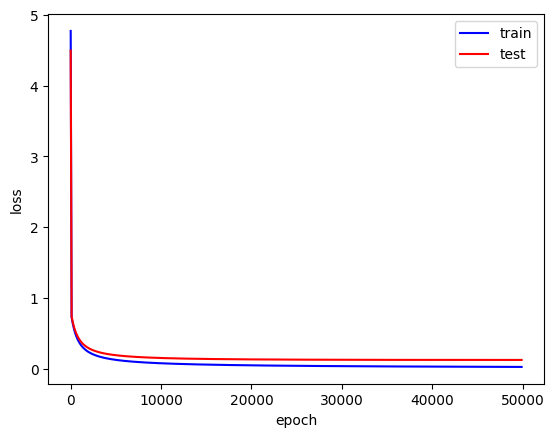

In [31]:
# 学習曲線の表示（損失）
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'r', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

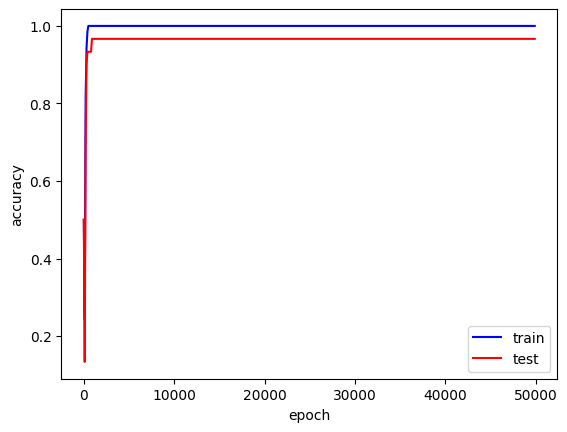

In [32]:
# 学習曲線の表示（精度）
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'r', label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()